# 평가 - 성능평가 지표

머신러닝 프로세스
- 데이터 가공/변환
- 모델 학습/예측
- 평가
  
앞의 파이타닉 생존자 예제에서는 모델 예측 성능의 평가를 위해 정확도(Accuracy) 이용  
머신러닝에서는 여러가지 예측 성능 평가 방법을 사용함  
성능 평가는 분류냐 회귀냐에 따라서 여러 종류로 나뉘게 됨  

## 분류 유형

이진 분류
- 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결과값만 가지는 분류
  
멀티 분류
- 여러 개의 결정 클래스 값을 가지는 분류

## 분류의 성능 평가 지표
- 정확도(Accuracy)
- 오차행렬 (Confusion Matrix, 혼동 행렬)
- 정밀도 (Precision)
- 재현율 (Recall)
- F1 스코어 
- ROC, AUC  
  
이진/멀티 분류에 모두 적용되는 지표이만 이진 분류에서 더 중요하게 강조되는 지표

___
# 정확도 (Accuracy)
실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표  
정확도(Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수  
직관적으로 모델 예측 성능을 나타내는 평가 지표임 그러나 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에  
정확도 수치 하나만 가지고 성능을 평가하지 않음  
특히, 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 평가할 경우 적합한 지표가 아님

## 정확도 지표가 ML 모델의 성능을 왜곡하는 예
타이타닉 예제 수행 결과 정확도의 결과가 80% 대 였지만 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에  
별다른 알고리즘 적용 없이 무조건 성별이 여자인 경우 생존, 남자인 경우 사망으로 예측해도 이와 비슷한 수치가 나올 수 있음  
알고리즘 성능이 좋지 않더라고 단지 성별 조건 하나만을 가지고도 높은 정확도를 나타내는 상황이 발생할 것  
  
아래 예시로 살펴보자
  1. 타이타닉 생존자 예측
  2. MNIST 데이터 세트

### 1. 타이타닉 생존자 예측

정확도 지표가 ML 모델의 성능을 왜곡하는 예1   
fit() : 아무것도 수행하지 않고  
predict() : 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측 (단순히 남자는 사망, 여자는 생존)  

In [19]:
import numpy as np
from sklearn.base import BaseEstimator

# 아무런 학습도 하지 않고 성별에 따라 생존자를 예측하는 단순한 Classifier 생성
# BaseEstimator를 상속 받음
class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred

In [20]:
## 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 타이타닉 데이터 로딩 및 학습 데이터 / 테스트 데이터 분할
titanic_df = pd.read_csv('210722_머신러닝06_titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [22]:
# 위에서 생성한 Dummy Classifier를 활용해서 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도: {0: .4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도:  0.8324


단순한 알고리즘을 예측하더라도 데이터의 구성에 따라 정확도 결과는 약 78.77%로 꽤 높은 수치가 나올 수 있기에  
정확도를 평가 지표로 사용할 때는 매우 신중해야 합니다.  
특히 정확도는 불균형한 레이블 값 분포 ML 모델의 성능을 판단할 경우 적합한 평가 지표가 아님  

### 2. MNIST 데이터 세트
정확도 지표가 ML모델의 성능을 왜곡하는 예2  
유명한 MNIST 데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤에  
정확도 지표 적용 시 어떤 문제가 발생하는지 확인  

#### MNIST 데이터 세트  
MNIST 데이터 세트를 변환하여 불균형한 데이터 세트를 만든 뒤 정확도 지표 적용시 어떤 문제가 발생할 수 있는지 살펴보기  
- 0 ~ 9 까지 데이터를 가지고 있고 이를 기반으로 숫자 Digit 예측하는데 사용  
- 사이킷런의 load_digits() API를 통해 MNIST 데이터 세트 제공

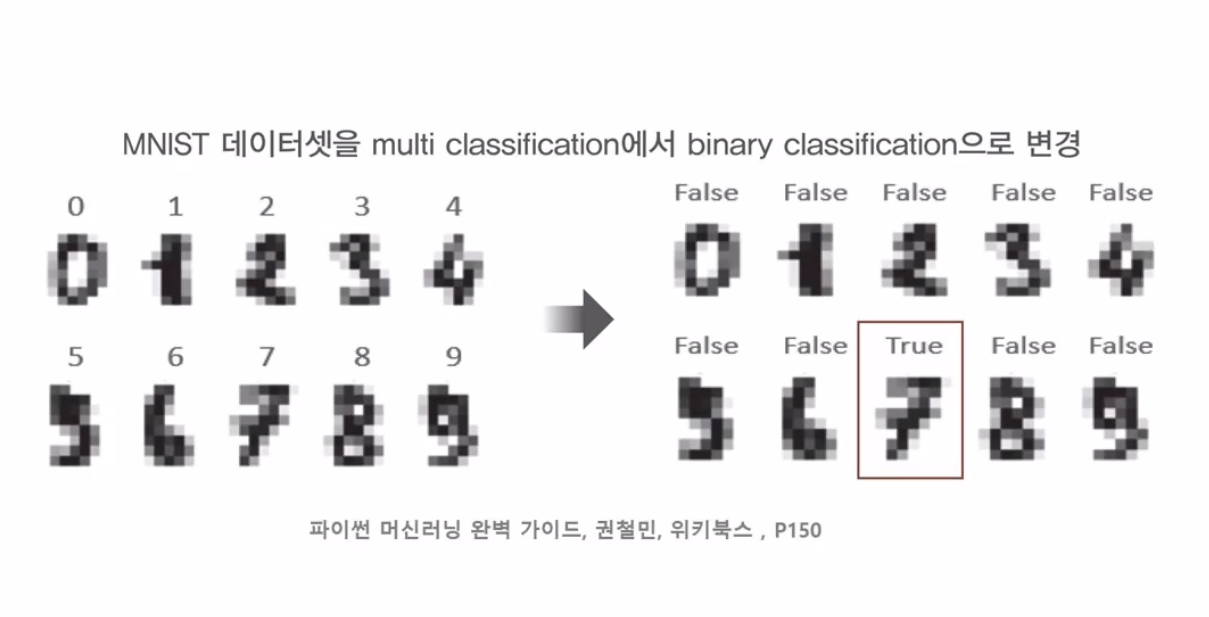

#### 이진 분류 문제로 변환
불균형한 데이터 세트로 변형  
레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환  
True : 전체 데이터의 10 %  
False : 90%  
모든 데이터를 False, 즉 0으로 예측하는 Classifier를 이용해서 정확도를 측정하면 90%에 가까운 예측 정도를 나타냄  
정확도 평가 지표의 맹점 : 아무것도 하지 않고 무조건 특정한 결과로 찍어도 데이터가 균일하지 않은 경우 높은 수치가 나타날 수 있음

#### 불균형한 데이터 세트와 Dummy Classifier를 생성하자

In [24]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator) :
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y) :
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
        
# 사이킷런의 내장 데이터 셋인 load_digits()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print('digits.data.shape :', digits.data.shape)
print()
print(digits.target)
print('digits.target.shape :', digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
digits.data.shape : (1797, 64)

[0 1 2 ... 8 9 8]
digits.target.shape : (1797,)


In [25]:
## 참고
# 타겟값에서 10개만 뽑아서 보자
a = digits.target[:10]
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
## 참고
# 7을 제외한 나머지는 False로가 됨
a == 7

array([False, False, False, False, False, False, False,  True, False,
       False])

In [27]:
## 참고
# 숫자형으로 바꾸면 T=1, F=0으로 변환됨
b = (a==7).astype(int)
b

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [28]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [29]:
# digits 번호가 7번이면 True이고 dlfma satype(int)로 1로 변환
# 7번이 아니면 False이고, 0으로 변환
y = (digits.target == 7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
# 학습/테스트 데이터 세트로 분리
# test_size 설정 안함 (이 경우 디폴트가 25% 임!)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [31]:
X_train.shape

(1347, 64)

In [32]:
X_test.shape  # 450/1347 (25%)

(450, 64)

#### 다음으로 불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인해 보자

In [33]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


#### MyFakeClassifier를 이용해서 예측과 평가를 수행해 보자  

In [34]:
# MyFakeClassifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fake_prediction = fakeclf.predict(X_test)

print('모든 예측을 0으로 했을 때의 정확도 :', accuracy_score(y_test, fake_prediction))

모든 예측을 0으로 했을 때의 정확도 : 0.9


단순히 predict()의 결과를 np.zeros()로 모두 0 값으로 반환함에도 불구하고  
450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%임  
모든 것을 0으로 예측해도 MyFakeClassifier의 정확도가 90%  
우수한 ML 알고리즘과 동등한 성능이란 것은 말도 안되는 결과임
  
이처럼 정확도 평가지표는 불균형한 레이블 데이터 셋에서는 성능지표로 사용되서는 안됨  
→ 이를 극복하기 위해 정확도는 여러 지표와 함께 적용되어야 함  

___
# 오차행렬 (Confusion Matrix)
분류의 성능을 평가하는 행렬 혼돈행렬 이라고도 부름  
실제로 참(True)인지 거짓(False)인지, 예측을 긍정(Positive)로 했는지, 부정(Negative)로 했는지에 따라 4개의 경우의 수로 구분한 표  
4분면 행렬에서 예측 클래스와 실제 클래스의 값 유형에 따라 TN, FP, FN, TP 형태  
학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표  
  
#### 머신러닝에서 오차 행렬이 중요한 이유
머신러닝 모델의 예측이 얼마나 잘 한 예측인지를 판단하는 중요한 기준을 제공  
오차행렬로부터 머신러닝 모델의 우수성을 평가하는 다른 여러 지표들을 도출  

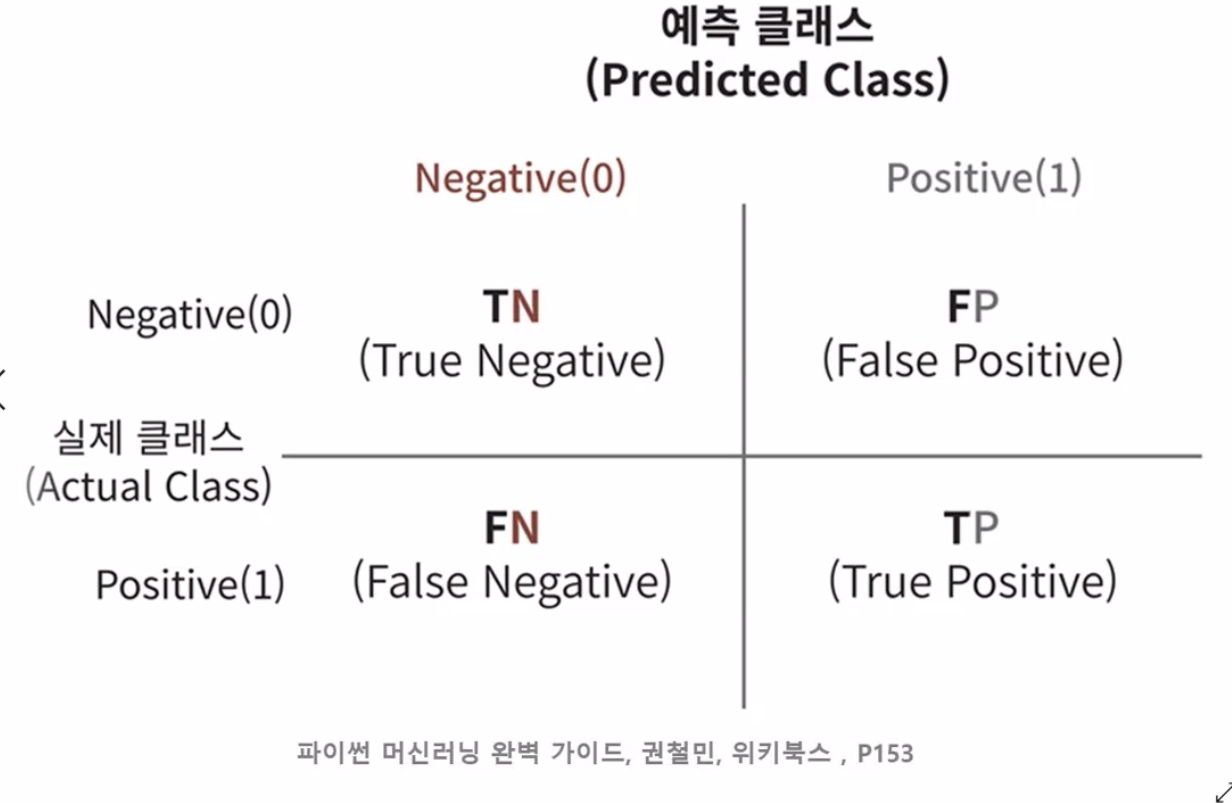

TN, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정값(1)과 Negativ(0)의 결합에 따라 결정  
- 앞 문자 T/F(True/False) : 예측값과 실제값이 '같은가/틀린가'의미
- 뒤 문자 N/P(Negative/Positive) : 예측 결과 같이 부정(0)/긍정(1)의 의미
  
예) TN(True Negative)
- 앞 True : 예측 클래스 값과 실제 클래스 값이 같다는 의미
- 뒤 Negative : 예측 값이 Negative 값이라는 의미

사이킷런은 오차행렬을 구하기 위해 confusion_matrix() API 제공  
앞의 예제 MyFakeClassifier의 예측 성능 지표를 오차행렬로 표현  
MyFakeClassifier의 예측 결과인 fake_pred와 실제 결과인 y_test


In [37]:
# MyFakeClassifier의 예측 결과인 fakepred와
# 실제결과인 y_test를 confusion_matrix의 인자로 입력해서 출력
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, fake_prediction)
cm

array([[405,   0],
       [ 45,   0]])

**결과**    
[[TN, FP],  
 [FN, TP]]

MyFakeClassifier는 load_digits()에서 target=7인지 아닌지에 따라  
클래스 값을 True/False 이진 분류로 변경한 데이터 세트를 사용해서  
무조건 Negative로 예측하는 Classifier였고  
테스트 데이터 세트의 클래스 값 분포는 0이 450건, 1이 45건 이었음  

* TN : 전체 450건 데이터 중 무조건 Negative 0으로 예측해서 True가 된 결과 405건
    - 실제값/예측값 동일, Negative로 예측  
* FP : Positive 1로 예측한 건수가 없으므로 0건
    - 실제값/예측값 다름, Positive로 예측  
* FN : Positive 1인 건수 45건을  Negative 0으로 예측해서 False가 된 결과 45건
    - 실제값/예측값 다름, Negative로 예측  
* TP : Positive 1로 예측한 건수가 없으므로 0건
    - 실제값/예측값 동일, Positive로 예측

TN, FP, FN, TP 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보 제공  
이 값을 조합해서 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도, 정밀도, 재현율 값을 알 수 있음

#### 오차행렬 상에서 정확도
정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터  
(TN + TP) / (TN, FP, FN, TP)

일반적으로 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 아주 적은 수의 결과값에 Positive를 설정해서 1 값을 부여하고 그렇지 않은 경우는 Negative로 0을 부여하는 경우가 많음  
  
예1 : 사기 행위 예측 모델
- 사기 행위 : Positive 양성으로 1값 부여
- 정상 행위 : Negative 음성으로 0값 부여
  
예2 : 암 검진 모델  
- 양성 : Positive 양성으로 1값 부여
- 음성 : Negative 음성으로 0값 부여

#### 불균형한 데이터 세트
불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive 보다는 Negative로 예측 정확도가 높아지는 경향이 발생  
  
10,000건의 데이터 세트에서 9,900건이 Negative이고 100건이 Positive라면  
Negative로 례측하는 경향이 강해져서 TN이 매우 커지고 TP는 매우 작아지게 됨  
  
또한 Negative로 예측할 떄 정확도가 높기 때문에  
FN(Negative로 예측할 때 틀린 데이터 수)가 매우 작고  
Positive로 예측하는 경우가 작기 때문에 FP 역시 매우 작아짐  
  
결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채  
Negative에 대한 예측 정확도만으로 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으킴  
  
불균형 데이터 세트에서 정확도보다 더 선호되는 평가 지표는 **정밀도**와 **재현율**이다.

___
# 정밀도와 재현율
정밀도(Precision)와 재현율(Recall)

정밀도(Precision)와 재현율(Recall) Positive 데이터 세트의 예측 성능에 더 초점을 맞춤 평가 지표  
앞의 MyFakeClassifier는 Positive로 예측한 TP값이 하나도 없기 때문에  
정밀도와 재현율 값이 모두 0으로 나타남  

## 정밀도와 재현율 계산 공식
- 정밀도 = TP / (FP + TP)
- 재현율 = TP / (FN + TP)

## 정밀도
정밀도 = TP / (FP + TP)  
예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율  
예측한 양성 대 맞춘 양성임   
공식의 분모인 (FP + TP)는 예측을 Positive로 한 모든 데이터 건수 (예측한 양성)  
분자인 TP는 예측과 실제값이 Positive로 일치한 데이터 건수 (맞춘 양성)
Positive 예측 성능을 더 정밀하게 측정하기 위한 평가 자료이며 양성 예측이라고도 함  

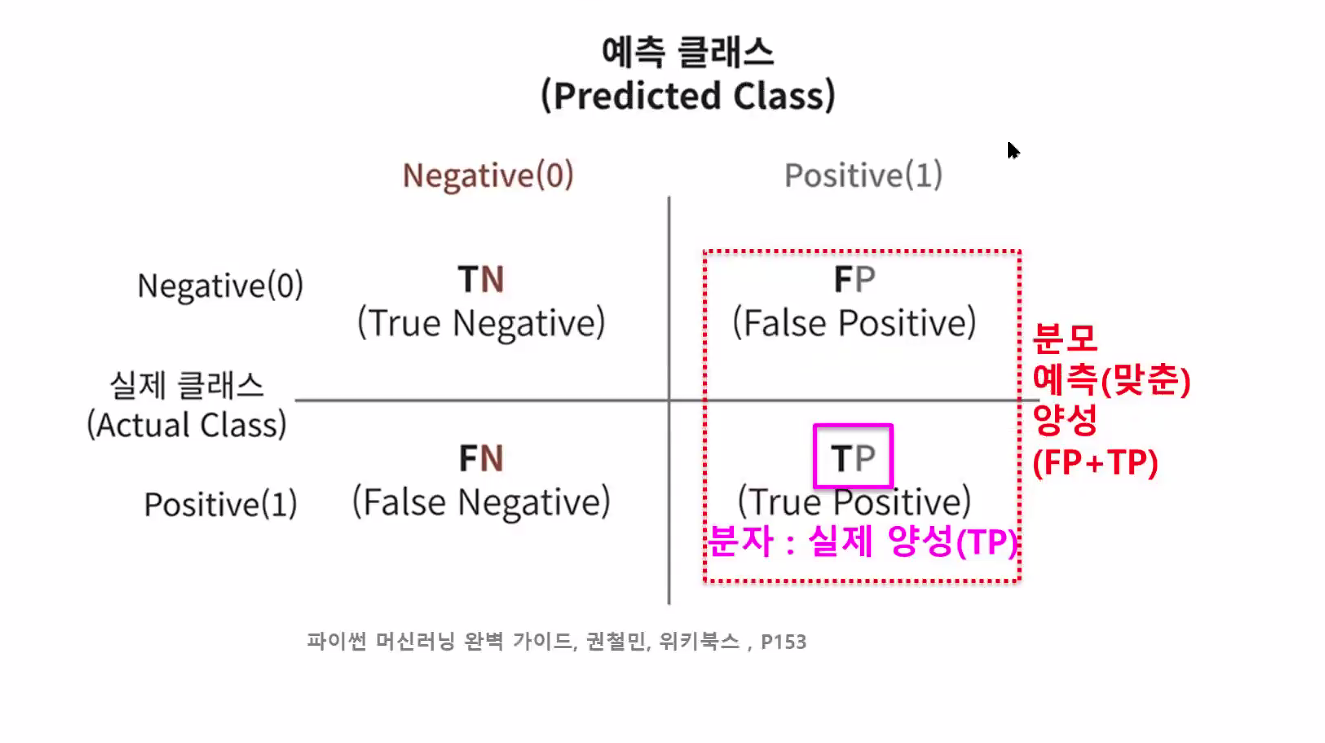

## 재현율
재현율 = TP / (FN + TP)
실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 비율  
실제 양성 대 예측한(맞춘) 양성 비율임  
공식의 분모인 (FN + TP)는 실제 값이 Positive인 모든 데이터 건수 (실제 양성)  
분자인 TP는 예측과 실제값이 Positive로 일치한 데이터 건수 (맞춤 양성)  
민감도(Sensitivity) 또는 TRP(True Positive Rate)

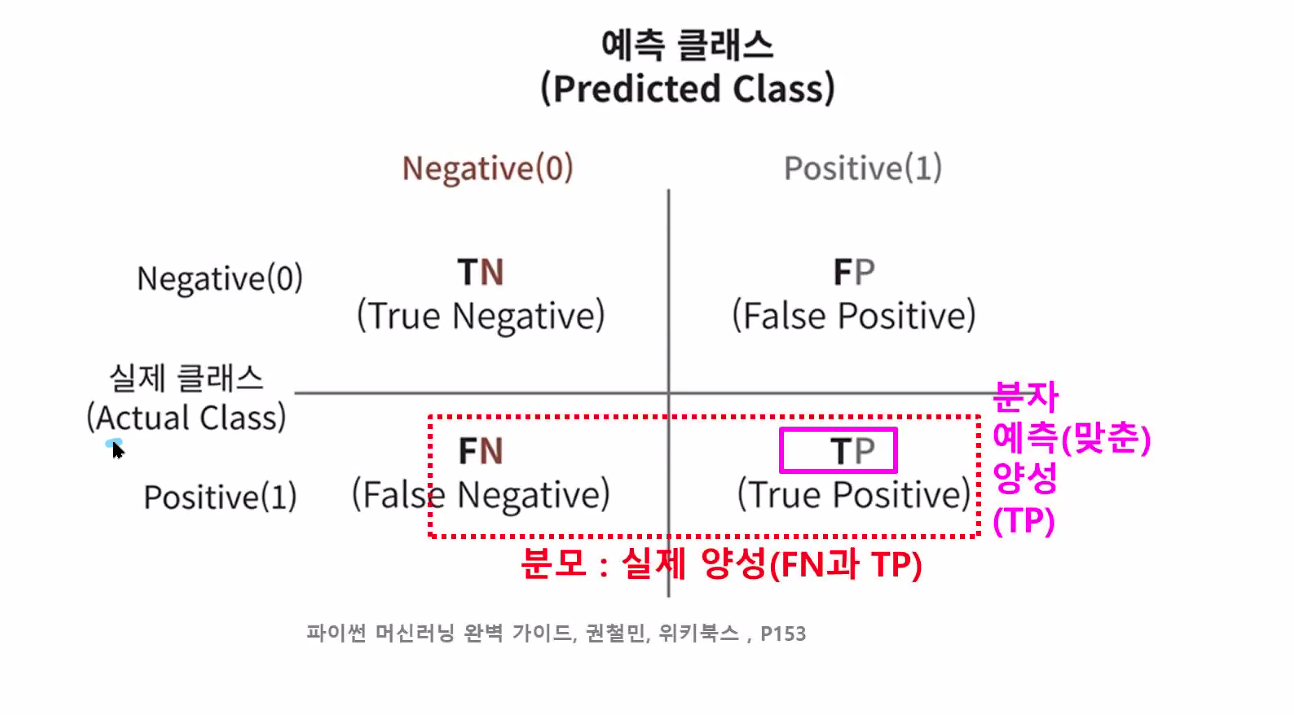

#### 재현율이 중요 지표인 경우
실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우  
  
예1 : 암 판단 모델  
실제 Positive 인 암 환자를 Positive 양성이 아닌    
Negative 음성으로 잘못 판단했을 경우 생명과 밀접한 문제가 발생함  
반대로 실제 Negative인 환자를 암환자인 Positive로 예측하더라도  
재검사 등 수준의 비용(문제) 문제 발생 (심각한 정도는 아닌 문제 발생)  
  
예2 : 보험 사기와 같은 금융 사기 적발 모델  
실제 금융거래 사기인 Positive을 Negative로 잘못 판단하게 되면 회사에 미치는 손해가 큼  
반대로 정상 금융 거래인 Negative를 금융 사기인 Positive로 잘못 판단해도  
재학인 등의 절차로 큰 문제가 되지 않을 수 있음  

보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많지만 정밀도가 더 중요한 지표인 경우도 있음  
  
예 : 스팸메일 여부를 판단하는 모델  
실제 Positive인 스팸 메일 Negative인 일반 메일로 분류하더라도 사용자 불편한 정도의 큰 문제를 발생하지는 않음  
실제 Negative인 일반 메일을 Positive인 스팸메일로 분류하는 경우 메일을 못 받게 되어 큰 문제가 발생함  

**재현율이 상대적으로 더 중요한 지표인 경우**  
실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우  
  
**정밀도가 상대적으로 더 중요한 지표인 경우**   
실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
  
**정밀도와 재현율 계산 공식**  
- 정밀도 = TP / (FP + TP)
- 재현율 = TP / (FN + TP)  

## 재현율과 정밀도의 보완적 관계
재현율과 정밀도 모두 TP를 높이는데 동일하게 초점을 맞추지만  
재현율은 FN(실제 Positive, 예측 Negative)을 낮추는데 초점을 맞추고  
정밀도는 FP(실제 Negative, 예측 Positive)를 낮추는데 초점을 맞춤  
이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표이다  
분류의 성능을 평가하는데 적용함  
  
가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것  
반면에 둘 중 어느 한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않음  

## MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

In [95]:
# MNIST에서 정밀도, 재현율 확인
# 정밀도와 재현율 계산을 위해 하나로 모아서 적용

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator) :
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y) :
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
        
# 사이킷런의 내장 데이터 셋인 load_digits()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

# 숫자 7번이면 0, 나머지는 1
y = (digits.target == 7).astype(int)

# 학습/테스트 데이터 세트로 분리 (디폴트 : 25%)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

# MyFakeClassifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fake_prediction = fakeclf.predict(X_test)

In [96]:
## 참고 : fake_predicion 값 확인
# fack_pridiction : 모두 0으로 예측
fake_prediction.sum()

0

### 정밀도와 재현율 확인
정밀도 계산 : precision_score(실제값, 예측값)  
재현율 계산 : recall_score(실제값, 예측값)  

In [97]:
# 정밀도와 재현율 확인
# 정밀도 계산 : precision_score(실제값, 예측값)
# 재현율 계산 : recall_score(실제값, 예측값)

from sklearn.metrics import precision_score, recall_score
print('정밀도 :', precision_score(y_test, fake_prediction))
print('재현율 :', recall_score(y_test, fake_prediction))

정밀도 : 0.0
재현율 : 0.0


/Users/jiwon/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**결과**  
정밀도와 재현율 계산 공식  
정밀도 = TP / (FP + TP)  
재현율 = TP / (FN + TP)  
  
Positive로 예측한 값이 하나도 없음 분자인 TP가 0이기 때문에 결과도 0

## 타이타닉 데이터로 로지스틱 회귀로 분류 실행
타이타닉 예제로 오차 행렬, 정밀도, 재현율울 구해서 예측 성능 평가  
사이킷런 API 사용  
- 정밀도 예산 : precision_score()
- 재현율 계산 : recall_score()
- 오차 행렬 : confusion_matrix()

### 평가를 간편 적용하기 위한 함수 사용  
정밀도, 재현율, 오차행렬 등의 평가를 한꺼번에 수행하는 함수

In [50]:
# 정밀도, 재현율, 오차행렬 등의 평가를 한꺼번에 수행하는 함수

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix


def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)  # 정확도
    precision = precision_score(y_test, pred)  # 정밀도
    recall = recall_score(y_test, pred)  # 재현율

    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(
        accuracy, precision, recall))

### 타이타닉 데이터 세트 전처리 가져오기

In [51]:
# 타이타닉 데이터 세트 전처리 작업 내용 (Chapter02_머신러닝06)

from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫 문자만 추출
    
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 위에서 만든 모든 함수를 한 번에 호출해서 사용하기 위한
# 함수 작성
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

### 로지스틱 회귀 기반 타이타닉 생존자 예측
로지스틱 회귀 기반을 타이타닉 생존자 예측하고 오차행렬, 정확도, 정밀도, 재현율 평가 수행  

In [92]:
# 로지스틱 회귀 기반을 타이타닉 생존자 예측하고 오차행렬, 정확도, 정밀도, 재현율 평가 수행

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩,데이터 가공, 학습 데이터/테스트 세트 분할
titanic_df = pd.read_csv('data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705, F1 스코어 : 0.7966


___
# 정밀도/재현율 트레이드 오프 (Trade-off)

**정밀도/재현율 트레이드 오프 (Trade-off)**  
업무에 따라서 정밀도/재현율 중요도가 다름  
분류하려는 업무 특성상 정밀도 또는 재현율이 특별히 강조되어야 할 경우  
분률의 결정 입계값 (Threshold)을 조정해서 정밀도 또는 재현율의 수치를 높일 수 있음  
그러나 정밀도와 재현율은 상호 보완적이 평가 지표이기 때문에  
어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지는데 이를 정밀도/재현율의 트레이드 오프라고 함  
사이킷런에서는 분류 결정 임계값을 조절해서 정밀도와 재현율의 성능 수치를 상호 보완적으로 조장 가능  
  
**분류 결정 임계값**  
Positive 예측값을 결정하는 확률의 기준  
임계값을 낮출수록 True 값이 많아짐

**사이킷런의 분류 알고리즘에서 결정 확률을 구하는 방식**  
예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블 별로 결정 확률을 구한다  
예측 확률이 큰 레이블 값으로 예측하게 됨
  
예) : 이진 분류 모델  
특정 데이터가 0이 될 확률이 10% 이고 1이 될 확률이 90% 로 예측한 경우  
최종 예측은 더 큰 확률을 가진 1로 예측한다    
  
일반적으로 이진 분류에서는 이 임계값을 0.5(50%)로 정하고  
기준값보다 확률이 크면 Positive 작으면 Negative로 결정한다  
  
**사이킷런에서 개별 데이터 별로 예측 확률을 구하는 메서드**  
`predict_proba()`메서드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며  
테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함  
`predict()` 메서드와 유사하지만 반환 결과가 예측 클래스 값이 아닌 예측 확률 결과임
  
- `predict()` : 예측값 반환 (0 또는 1)
- `predict_proba()` : 예측확률 반환 (0.12344)

## predict_proba()메서드 확인
predict_proba()메서드 확인  
타이타닉 생존자 데이터를 학습한 LogisticRegression 객체에서    
`predict_proba()` 메서드를 수행한 뒤 반환값 확인하고  
`predict()` 메서드와 결과 비교  
  
앞 예제에 이어서 코드 작성

In [53]:
# lr_clf = LogisticRegression()
# predict_proba(테스트 피처 데이터 세트) : 예측 확률 반환
pred_proba = lr_clf.predict_proba(X_test)

print('predict_proba() 결과 shape : {0}'.format(pred_proba.shape))
print('predict_proba array 에서 앞 3개만 샘플로 추출 : \n', pred_proba[:3])

predict_proba() 결과 shape : (179, 2)
predict_proba array 에서 앞 3개만 샘플로 추출 : 
 [[0.46196457 0.53803543]
 [0.87861802 0.12138198]
 [0.8771453  0.1228547 ]]


**결과**    
[0이 될 확률  1이 될 확률]  
[[0.46196457 0.53803543]  
[0.87861802 0.12138198]  
[0.8771453  0.1228547 ]]  
  
predict_proba() 결과 설명 : 예측 확률 array  
첫 번째 칼럼은 0이 될 확률  
두 번째 칼럼은 1이 될 확률  
첫 번째 칼럼과 두 번째 칼럼 값을 더하면 1이 됨  
0.46196457 + 0.53803543 = 1

In [54]:
# predict(테스트 피처 데이터 세트) : 예측 결과 클래스 값(결정값) 반환
pred = lr_clf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

## 예측 확률과 결과값 합치기
예측 확률 array와 예측 결과값 array를 concatenate() 사용해서 예측 확률과 결과값을 한 눈에 확인  

In [57]:
# 예측 확률과 결과값 합치기
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:10])

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46196457 0.53803543 1.        ]
 [0.87861802 0.12138198 0.        ]
 [0.8771453  0.1228547  0.        ]
 [0.88264934 0.11735066 0.        ]
 [0.85533832 0.14466168 0.        ]
 [0.88221093 0.11778907 0.        ]
 [0.8883666  0.1116334  0.        ]
 [0.20891303 0.79108697 1.        ]
 [0.7829497  0.2170503  0.        ]
 [0.36931289 0.63068711 1.        ]]


#### predict() / predict_proba() 메서드 관계
predict()는 predict_proba()에 기반해서 생성  
predict_proba() 호출 결과로 반환된 배열에서  
분류 결정 임계값보다 큰 값이 들어있는 칼럼의 위치를 받아서  
최종적으로 예측 클래스(결정값) 결정

## Binarizer 클래스 활용
사이킷런 Binarizer 클래스 이용해서 분류 결정 임계값 조정  
정밀도와 재현율의 성능 수치를 상호 보완적으로 조정 가능

### Binarizer 클래스 이용 예측값 변환 예제
임계값(threshold) 변수를 특정 값으로 설정하고 Binarizer 클래스의 fit_transform() 메서드를 이용해서  
넘파이 ndarray 입력값을 지정 threshold 보다 같거나 작으면 0값으로, 크면 1값으로 반환  

In [59]:
# Binarizer 클래스 이용 예측값 변환 예

from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
# threshold 기준값이 1.1임
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


입력된 X 데이터 세트에서 Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환됨을 알 수 있음  
이제 이 Binarizer를 이용해 사이킷런 predict()의 의사(pseudo)코드를 만들어 보겠습니다  
바로 앞 예제의 LogisticRegression 객체의 predict_proba() 메서드를 구한 각 클래스별 예측 확률값인 pred_proba 객체 변수에 분류 결정 임곗값(threshold)을 0.5로 지정한 Binarizer 클래스를 적용해 최종 예측값을 구하는 방식입니다.  이렇게 구한 최종 예측값에 대해 get_clf_eval() 함수를 적용해 평가 지표도 출력해보겠습니다  

### 분류 결정 임계값 0.5기반해서 Binarizer를 이용해서 예측값 반환

In [62]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 값을 0.5로 설정
custom_threshold = 0.5

# predict_proba() 반환값 : [0이 될 확률  1이 될 확률]의 두 번재 칼럼
# 즉 Positive 클래스 칼럼 하나만 추출해서 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

## 결과
# 앞에서 predict()로 구한 결과와 동일함

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


### 분류 결정 임계값 0.4기반해서 Binarizer를 이용해서 예측값 반환

In [65]:
# Binarizer의 threshold 값을 0.5로 설정
custom_threshold = 0.4

# predict_proba() 반환값 : [0이 될 확률  1이 될 확률]의 두 번재 칼럼
# 즉 Positive 클래스 칼럼 하나만 추출해서 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

## 결과
# 임계값을 0.4로 낮추니까 정밀도는 떨어지고 재현율은 올라갔음!

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361


**결과**  
임계값을 0.4로 낮추니까 정밀도는 떨어지고 재현율은 올라갔음  
이유는 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 되는데  
확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에  
임계값을 낮출수록 True 값이 많아지게 됨

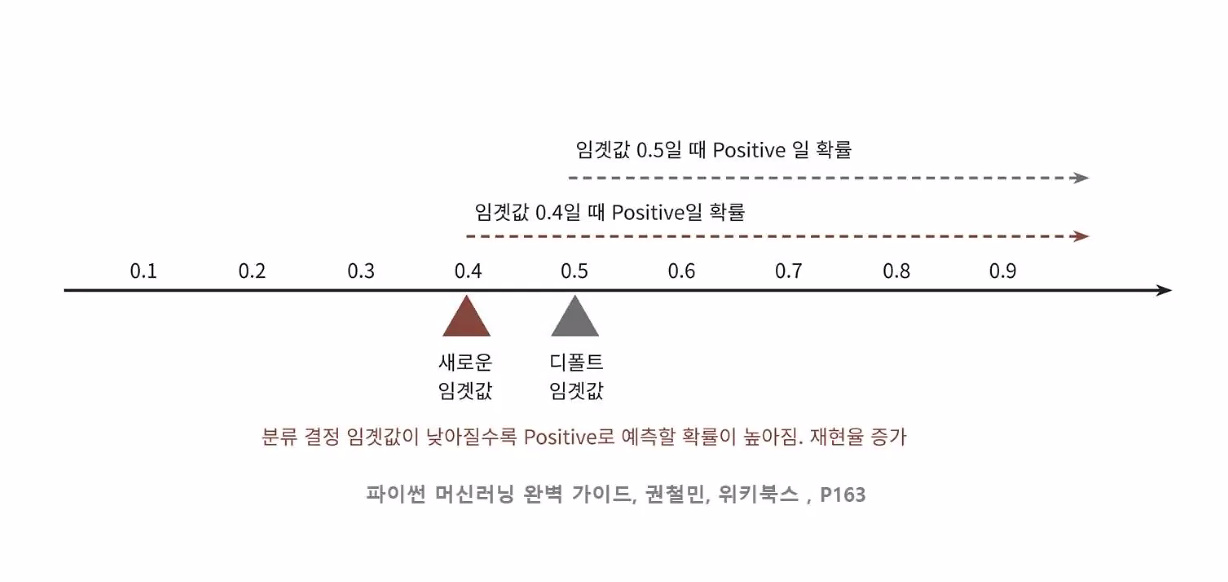

양성 예측을 많이 하니까 실제 양성을 음성으로 예측하는 회수가 상대적으로 줄어듦
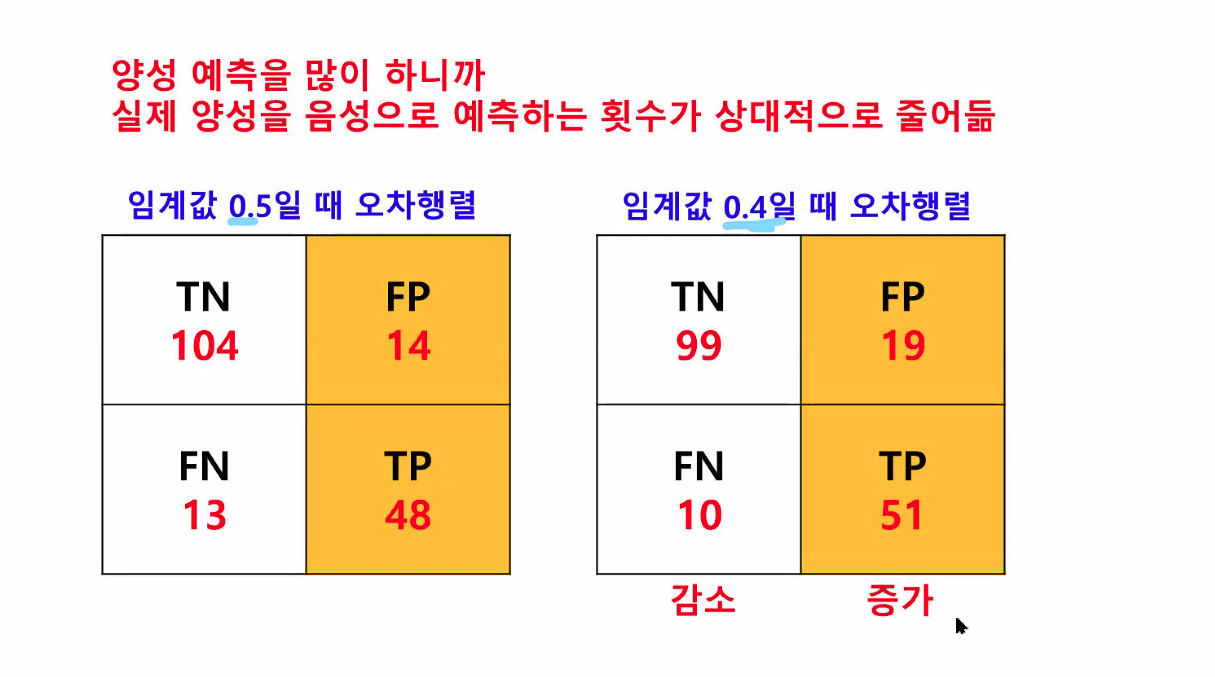

### 여러 개의 분류 결정 임계값을 변경하면서 Binarizer를 이용하여 예측값 반환

In [71]:
# 테스트를 수행할 모든 임계값 리스트 생성
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds) :
    # thresholds list객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('--------------------------------')
        print('임계값 :', custom_threshold)
        
        # 위에서 만든 평가 함수 호출
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

--------------------------------
임계값 : 0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361
--------------------------------
임계값 : 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033
--------------------------------
임계값 : 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869
--------------------------------
임계값 : 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541
--------------------------------
임계값 : 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377


**결과**  
정밀도/재현율 트레이드 오프  
한 쪽을 향상시키려면 다른 수치가 감소하니까 적당한 수치 선택  
임곗값이 0.45인 경우 디폴드 0.5인 경우와 비교해서 정확도는 동일하고 정밀도는 약간 떨어졌으나 재현율이 올라갔음  
재현율을 향상시키면서 다른 수치를 어느 정도 감소하는 희생을 해야 한다면 임곗값 0.45가 가장 적당해 보인다  

지금까지 임곗값 변화에 따른 평가 지표 값을 알아보는 코드를 작성했다  
사이컷런은 이와 유사한 precision_recall_curve() API를 제공한다  
`presion_recall_curve()` API의 입력 파라미터와 반환값은 다음과 같다  

**입력 파라미터**  
y_true : 실제 클래스값 배열 (배열 크기 = [데이터 건수])  
provas_pred : Positive 칼럼의 예측 확률 배열 (배열 크기 = [데이터 건수])  
  

**반환값**  
정밀도 : 임곗값별 정밀도 값을 배열로 반환  
재현율 : 임곗값별 재현율 값을 배열로 반환  

## precision_recall_curve() 이용하여 임계값에 다른 정밀도 - 재현율 값 추출

#### precision_recall_curve(실제값, 레이블 값이 1일 때의 예측 확률값)  
정밀도, 재현율, 임계값을 ndarray로 반환  
임계값 : 일반적으로 0.11 ~ 0.95 범위
정밀도와 재현율의 임계값에 따른 값 변화를 구선 형태의 그래스로 시각화 하는데 이용  
  
예제  
반환되는 임계값이 너무 작은 값 단위로 많이 구성되어 있음  
반환 임계값의 데이터 143건인데 임계값을 15단계로 해서 샘플로 10건만 추출  
좀 더 큰 값의 임계값과 그때의 정밀도/재현율 확인

In [74]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_prova_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제 값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_prova_class1)
print('반환된 분류 결정 임곗값 배열의 Shape :', thresholds.shape)
print('반환된 precisions 배열의 Shape :', precisions.shape)
print('반환된 recalls 배열의 Shape :', recalls.shape)
print('--------------------------------')
print('thresholds 5 sample :', thresholds[:5])
print('precisions 5 sample :', precisions[:5])
print('recallss 5 sample :', recalls[:5])

반환된 분류 결정 임곗값 배열의 Shape : (143,)
반환된 precisions 배열의 Shape : (144,)
반환된 recalls 배열의 Shape : (144,)
--------------------------------
thresholds 5 sample : [0.10396968 0.10397196 0.10399758 0.10776186 0.10894507]
precisions 5 sample : [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recallss 5 sample : [1.         0.98360656 0.98360656 0.98360656 0.96721311]


In [77]:
# 반환된 임계값 배열 로우가 143건이므로 샘플로 10건만 추출하되, 임곗값을 15 단계로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임계값 :', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임계값 배열의 index 10개 : [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 : [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]


In [78]:
# 15 Step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 :', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 :', np.round(recalls[thr_index], 3))

샘플 임계값별 정밀도 : [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 : [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


추출된 임곗값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면  
**임곗값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐**을 알 수 있다  
precision_recall_curve() API는 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있다  
precision_recall_curve() API는 정밀도와 재현율의 임곗값에 따른 값 변화를  
곡선 형태의 그래프로 시각화 하는데 이용할 수 있음  

## 임계값의 변화에 따른 정밀도-재현율 변환 곡선 그래프로 표현

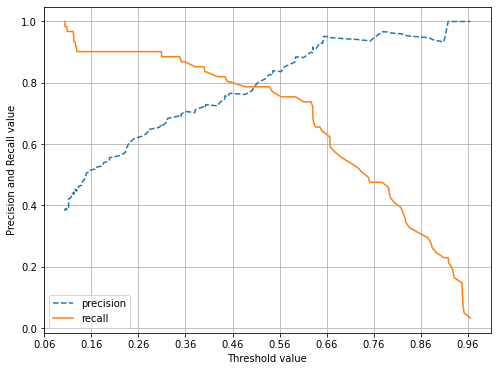

In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1) :
    # threshold ndarray 와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]  # (143, 0)에서 143 추출
    
    # thresholds는 143이고, precisions과 recalls는 144로 X축과 Y축 값의 개수가 맞지 않으므로
    # precisions과 recalls로 그래프를 그리면 오류가 남..
    # y값을 [0:threshold_boundary]로 143개 추출해서 X축 개수와 맞춤
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')   
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    # xlim() : X 축 범위를 지정하거나 반환
    start, end = plt.xlim()  # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X축, Y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

정밀도와 점선으로, 재현율은 실선으로 표현함  
그림에서 보다시피 임계값이 낮을수록 많은 수의 양성 예측으로 인해  
재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐  
임계값을 증가시킬수록 재현율을 낮아지고 정밀도는 높아지는 반대의 양상임  

## 정밀도와 재현율의 맹점
Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨  
임계값은 업무 환경에 맞춰 정밀도와 재현율의 수치를 상호 보완할 수 있는 수준에서 적용  
단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용해서는 안됨  
정밀도 또는 재현율 중 하나에 상대적인 중요도를 부여해  
각 예측 상황에 맞는 분류 알고리즘을 튜닝할 수 있지만  
정밀도와 재현율 성능 수치를 어느 한쪽만 참조하면 극단적인 수치 조작 가능  
  
**정밀도가 100%가 되는 방법**  
확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측  
전체 환자 1,000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 한다면  
한명만 Positive로 예측하고 나머지는 모두 Negative로 예측할 경우  
정밀도 = TP / (TP + FP) FP는 0, TP는 1 이므로 정밀도는 1/(0+1) 이 되어 100%가 됨  
  
분류의 종합적인 성능 평가에 사용하기 위해서는  
정밀도와 재현율의 수치를 적절하게 조정해야 함

___
# F1 스코어
F1 스코어(Score)는 정밀도와 재현율을 결합한 자료임  
정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상태적으로 높은 값을 가짐  

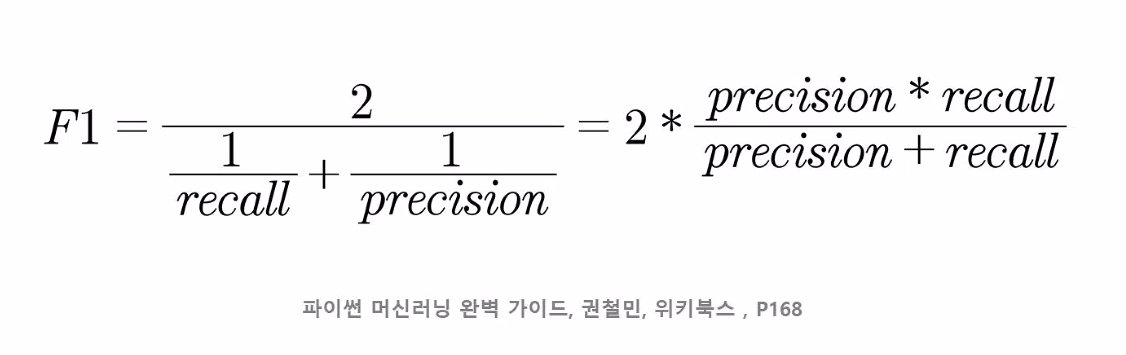

예) 2개의 예측 모델 비교  
  
**A 예측 모델**  
정밀도 : 0.9  
재현율 : 0.1 (극단적 차이)  
F1 스코어 : 0.18  
  
**B 예측 모델**  
정밀도 : 0.5  
재현율 : 0.5 (큰 차이 없음)  
F1 스코어 : 0.5  
  
B 모델의 F1 스코어가 A 모델에 비해 매우 우수

## 사이킷런의 F1스코어 API f1_score()

In [85]:
# 사이킷런의 F1스코어 API f1_score()
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'.format(f1))

F1 스코어 : 0.7805


## 타이타닉 생존자 예측 F1 스코어
타이타닉 생존자 예측에서 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기

In [87]:
# 타이타닉 생존자 예측에서 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)  # 오차행렬
    accuracy = accuracy_score(y_test, pred)  # 정확도
    precision = precision_score(y_test, pred)  # 정밀도
    recall = recall_score(y_test, pred)  # 재현율
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 스코어 : {3:.4f}'.format(
        accuracy, precision, recall, f1))
    
# 임계값을 0.4 ~ 0.6별로 정확도, 정밀도, 재현율, F1 스코어 확인
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

--------------------------------
임계값 : 0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361, F1 스코어 : 0.7727
--------------------------------
임계값 : 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033, F1 스코어 : 0.7840
--------------------------------
임계값 : 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, F1 스코어 : 0.7805
--------------------------------
임계값 : 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541, F1 스코어 : 0.7931
--------------------------------
임계값 : 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377, F1 스코어 : 0.8036


**결과**  
F1 스코어는 임곗값이 0.6일 때 가장 좋은 값을 보여줌  
그러나 임곗값이 0.6인 경우에는 재현율이 크게 감소하고 있으니 주의  
F1 스코어가 제일 높다고 그거 선택하는거 아님.. 적절히 다 고려해서 선택해야 함

___
# ROC 곡선과 AUC
ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표임  
ROC(Receiver Operation Characteristic Curve)은 우리말로 수신자 판단 곡전으로 불림  
ROC 곡선은 FPR(False Positive Rate)이 변할 때  
TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선임  
FPR을 X축으로, TPR을 Y축으로 잡아서 FPR을 0부터 1까지 변경하면서 TPR을 구하는 곡선  
    
#### TPR(True Positive Rate) : 재현율 민감도)  
- 실제 Positive를 Positive로 예측한 비율  
- 질병이 있는 사람을 질병이 있는 것으로 양성 판정  
- 값이 클수록 좋음 (양성을 잘 예측)

#### FPR(False Positive Rate) : 1-특이성
- 실제는 Negative인데 Positive로 잘못 예측한 비율
- 1 - 특이성(TNR)
  
#### TNR(True Negative Rate) : 특이성(Specigicity)
- 실제 음성인데 음성으로 예측한 비율
- 질병이 없는 사람을 질병이 없는 것으로 음성 판정
- 값이 클수록 좋음 (음성을 잘 예측)

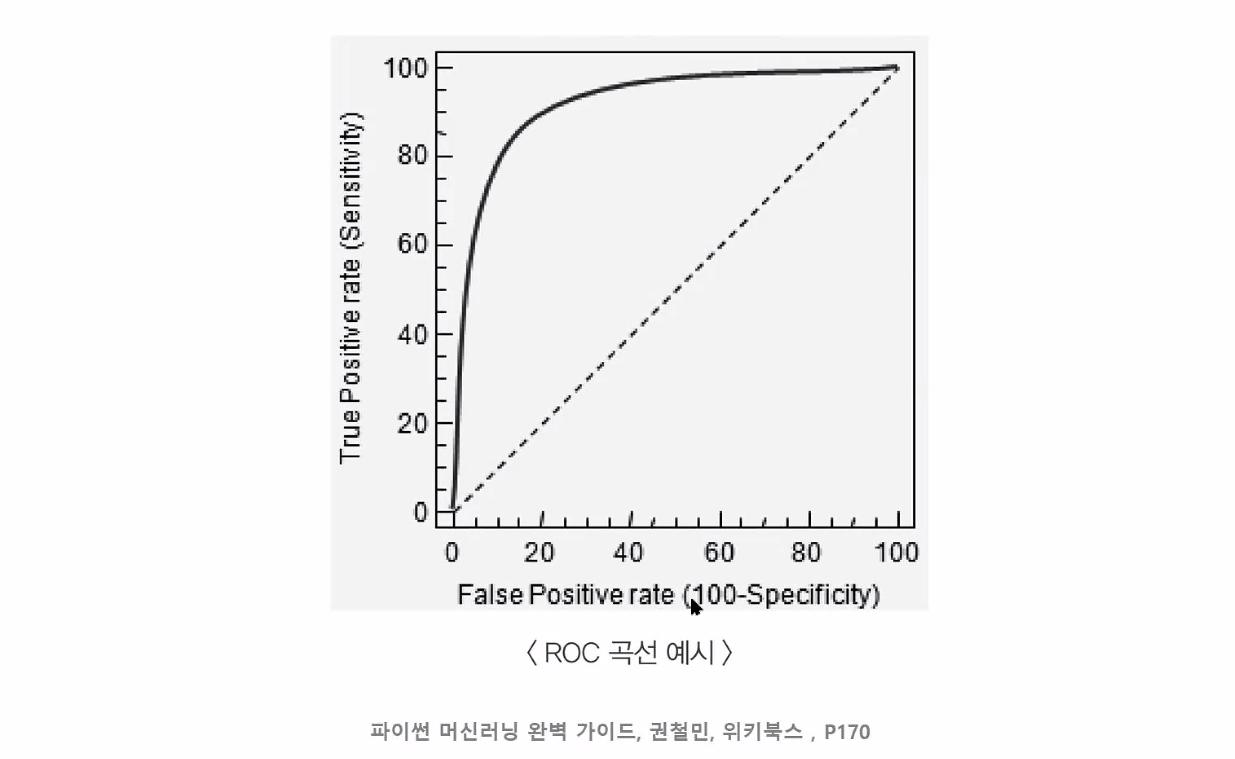

## 타이타닉 생존자 예측 모델 FPR, TPR 임곗값 구하기
사이킷런의 roc_curve() API를 이용해서  
타이타닉 생존자 예측 모델의 FPR, TPR, 임곗값 구하기  
  
정밀도와 재현율에서 학습한 LogisticRegression의 predic_proba() 결과 이용  
roc_curve(실제 데이터, 예측 확률)  
FPR, TPR, thresholds 반환

In [88]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_prova_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_prova_class1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곘값을 5 Step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index :', thr_index)
print('샘플 index로 추출한 임계값 :', np.round(thresholds[thr_index], 2))

# 5 Step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 FPR :', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR :', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index : [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값 : [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR : [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR : [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


**결과**  
임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐  
FPR이 조금씩 커질 때 TPR은 가파르게 커짐  
FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화 해보자

## 타이타닉 생존자 예측 모델 ROC 곡선 그리기

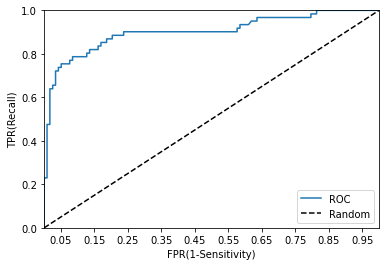

In [90]:
def roc_curve_plot(y_test, pred_proba_c1) :
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

**결과**  
일반적으로 곡선 자체는 FPR과 TPR 변화값을 보는데 이용하고  
분류의 성능 지표로 사용되는 것은 ROC곡선 면적에 기반한 AUC 값으로 결정함  
AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울 수록 좋음  
AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건  
가운데 직선에서 멀어지고 왼쪽 상단 모서리쪽으로 가파르게 곡선이 이동할 수록  
직사각형에 가까운 곡선이 되어 면접이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻게 됨  
가운데 직선은 랜덤 수준의 이진 부류 AUC 값으로 0.5  
따라서 보통의 분류는 0.5이상의 AUC 값을 가짐

## 타이타닉 생존자 예측 모델 AUC 값 구하기

In [91]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9024
